# Walmart Data Analysis Project by Praveen Kumar

In [28]:
import pandas as pd 

In [29]:
df  = pd.read_csv('Walmart.csv')
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [31]:
df.describe()

,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


In [32]:
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

In [33]:
df.duplicated().sum()

np.int64(51)

In [34]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [35]:
df.dropna(inplace=True)
df.isnull().sum()

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

In [36]:
df.shape

(9969, 11)

In [37]:
df['unit_price'].astype('float64')

ValueError: could not convert string to float: '$74.69'

In [38]:
# Removing the dollar sign and converting to float
df['unit_price'] = df['unit_price'].str.replace('$', '').astype('float64')
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48


In [39]:
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

In [40]:
df['Total'] = df['unit_price'] * df['quantity']
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,Total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


In [41]:
df.to_csv('Walmart_CleanedData.csv', index=False)

In [42]:
import pymysql
from sqlalchemy import create_engine
# Create a connection to the MySQL database

In [43]:
engine = create_engine('mysql+pymysql://root@localhost:3306/walmart_db')

df.to_sql('walmart_data', con=engine, if_exists='append', index=False)

9969

In [44]:
query = 'SELECT * FROM walmart_data LIMIT 5'
result = pd.read_sql(query, con=engine)
result.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,Total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48,604.17


In [45]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')
df['price'] = df['unit_price'].astype(float)
df['sales'] = df['price'] * df['quantity']

In [46]:
from matplotlib import pyplot as plt

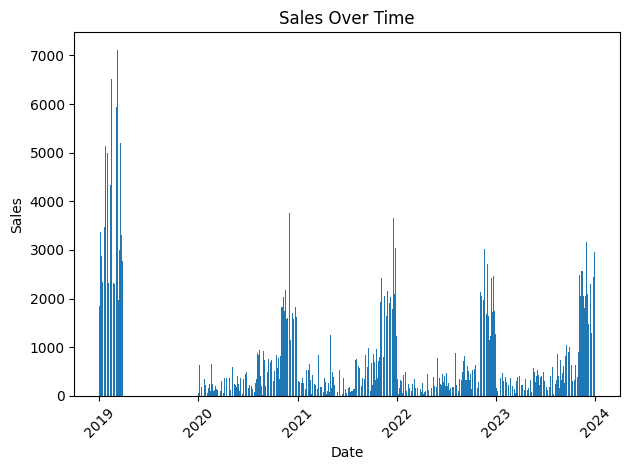

In [53]:
daily = df.groupby('date')['sales'].sum()

plt.figure()
plt.bar(daily.index, daily.values)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

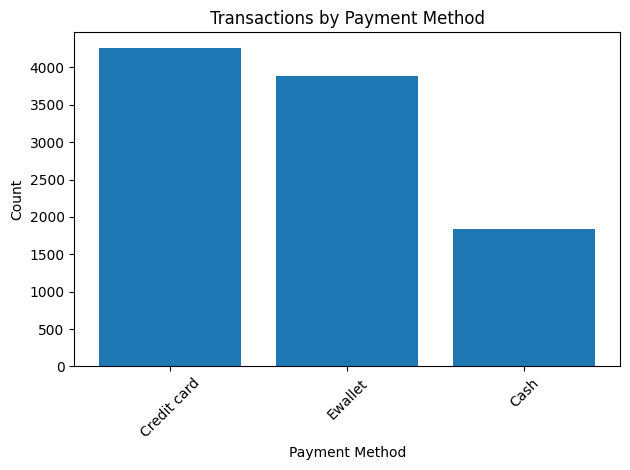

In [48]:
pm = df['payment_method'].value_counts()

plt.figure()
plt.bar(pm.index, pm.values)
plt.title('Transactions by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

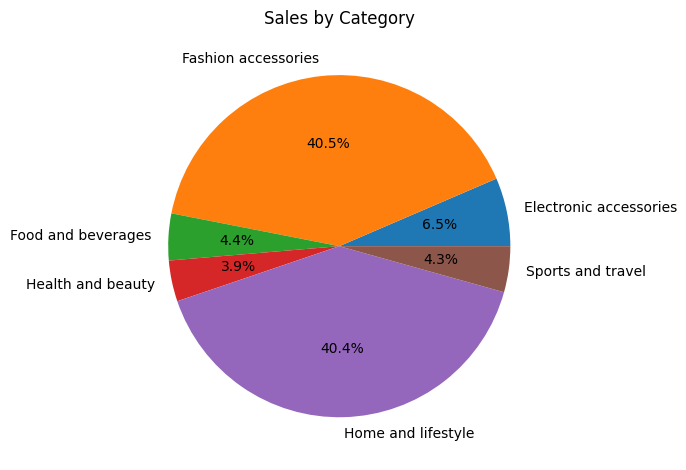

In [49]:
cat = df.groupby('category')['sales'].sum()

plt.figure()
plt.pie(cat.values, labels=cat.index, autopct='%1.1f%%')
plt.title('Sales by Category')
plt.tight_layout()
plt.show()